<a href="https://colab.research.google.com/github/HassanFrazKhan/Bitcoin-Prices-Predicting-with-ML-/blob/main/Bitcoin_Prices_Predicting_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importamt information**
**Plots Colour**
* Actual Price Colour= Red
* Linear Resressor Colour= Orange
* Random Forest Colour= Green
* LSTM Colour= Blue

### **Data Preparation**

<a href="https://colab.research.google.com/github/HassanFrazKhan/Bitcoin-Prices-Predicting-with-ML-/blob/main/Bitcoin_Prices_Predicting_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fetching Bitcoin data
end_date = datetime.today().strftime('%Y-%m-%d')
btc_data = yf.download("BTC-USD", start="2014-01-01", end=end_date, interval="1d")

# Ensuring the data is sorted by date
btc_data.sort_index(inplace=True)

# Calculate features using only past data (shifted by 1 day)
btc_data['MA_5'] = btc_data['Close'].rolling(window=5).mean().shift(1)
btc_data['MA_10'] = btc_data['Close'].rolling(window=10).mean().shift(1)
btc_data['MA_50'] = btc_data['Close'].rolling(window=50).mean().shift(1)

# Calculate Daily Returns (shifted by 1 day)
btc_data['Daily_Returns'] = btc_data['Close'].pct_change().shift(1) * 100

# Calculate Volatility (Rolling Standard Deviation of Returns, shifted by 1 day)
btc_data['Volatility'] = btc_data['Daily_Returns'].rolling(window=10).std().shift(1)

# Drop rows with NaN values (due to shifting and rolling calculations)
btc_data.dropna(inplace=True)

# Define features (X) and target variable (y)
X = btc_data[['MA_5', 'MA_10', 'MA_50', 'Daily_Returns', 'Volatility']]
y = btc_data['Close']

# Split data based on time
train_data = btc_data[btc_data.index < '2023-01-01']
test_data = btc_data[btc_data.index >= '2023-01-01']

X_train = train_data[['MA_5', 'MA_10', 'MA_50', 'Daily_Returns', 'Volatility']]
y_train = train_data['Close']
X_test = test_data[['MA_5', 'MA_10', 'MA_50', 'Daily_Returns', 'Volatility']]
y_test = test_data['Close']

train_data.to_csv("train_data.csv")
test_data.to_csv("test_data.csv")
X_train.to_csv("train_features.csv")
y_train.to_csv("train_target.csv")
X_test.to_csv("test_features.csv")
y_test.to_csv("test_target.csv")


[*********************100%***********************]  1 of 1 completed


### dataset description

In [2]:
# Printing the total number of days and features in the dataset
print('Total number of days present in the dataset:', btc_data.shape[0])
print('Total number of fields present in the dataset:', btc_data.shape[1])



Total number of days present in the dataset: 3709
Total number of fields present in the dataset: 11


In [3]:
# Checking the null values
print('Null Values:',btc_data.isnull().values.sum())
print('NA values:',btc_data.isnull().values.any())

Null Values: 0
NA values: False


### Summary of the DataFrame

In [4]:

btc_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3709 entries, 2014-11-06 to 2024-12-31
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, BTC-USD)  3709 non-null   float64
 1   (Close, BTC-USD)      3709 non-null   float64
 2   (High, BTC-USD)       3709 non-null   float64
 3   (Low, BTC-USD)        3709 non-null   float64
 4   (Open, BTC-USD)       3709 non-null   float64
 5   (Volume, BTC-USD)     3709 non-null   int64  
 6   (MA_5, )              3709 non-null   float64
 7   (MA_10, )             3709 non-null   float64
 8   (MA_50, )             3709 non-null   float64
 9   (Daily_Returns, )     3709 non-null   float64
 10  (Volatility, )        3709 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 347.7 KB


In [5]:
btc_data.head()

Price,Adj Close,Close,High,Low,Open,Volume,MA_5,MA_10,MA_50,Daily_Returns,Volatility
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,
Date,,,,,,,,,,,
2014-11-06,349.290009,349.290009,352.966003,338.424011,339.458008,18797000,329.834595,337.899701,372.766840,2.721394,2.783198
2014-11-07,342.415009,342.415009,352.731995,341.776001,349.817993,16834200,334.542798,337.529800,370.605960,2.887900,2.848767
2014-11-08,345.488007,345.488007,347.032013,342.153992,342.153992,8535470,337.847400,336.009500,368.965460,-1.968278,3.031467
2014-11-09,363.264008,363.264008,363.626007,344.255005,345.376007,24205600,341.434204,336.999200,367.979301,0.897448,3.043618
2014-11-10,366.924011,366.924011,374.816010,357.561005,362.265015,30450100,347.988605,338.795102,367.066501,5.145186,2.279882


### **Average Price (Daily, Weekly, Monthly, Yearly)**

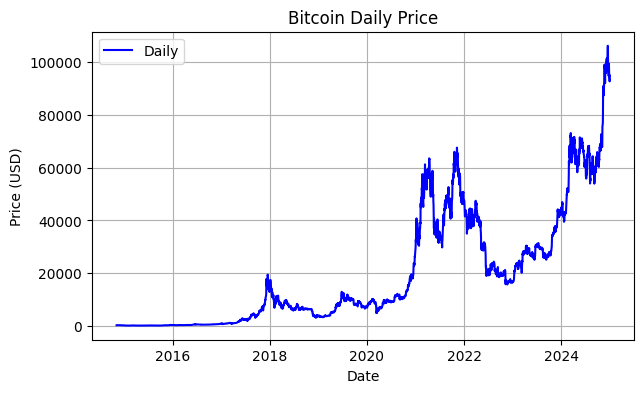

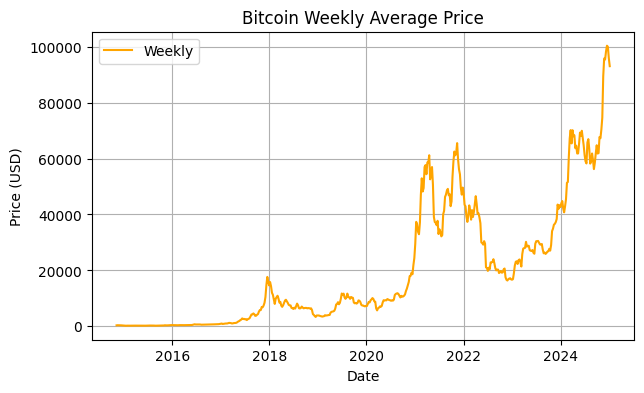

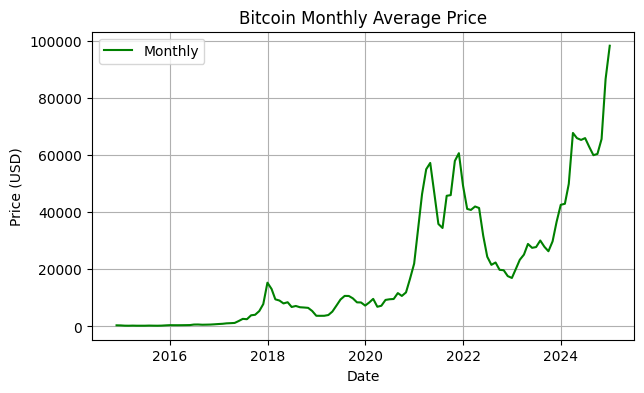

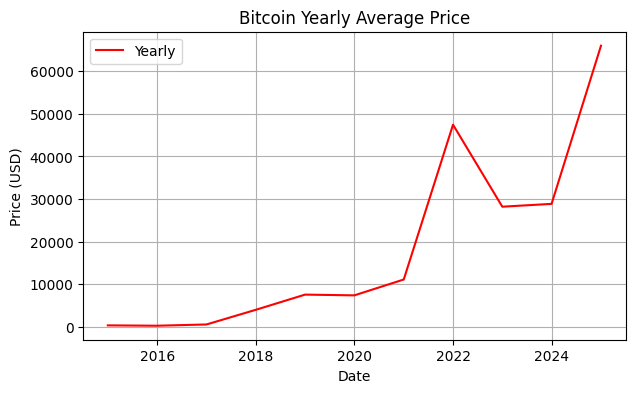

In [6]:
btc_data.reset_index(inplace=True)
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data.set_index('Date', inplace=True)

# Daily Chart
plt.figure(figsize=(7, 4))
plt.plot(btc_data.index, btc_data['Close'], color='blue', label='Daily')
plt.title('Bitcoin Daily Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(visible=True)
plt.show()

print("\n" * 1)


# Weekly Chart
weekly_data = btc_data['Close'].resample('W').mean()
plt.figure(figsize=(7, 4))
plt.plot(weekly_data.index, weekly_data, color='orange', label='Weekly')
plt.title('Bitcoin Weekly Average Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(visible=True)
plt.show()

print("\n" * 1)


# Monthly Chart
monthly_data = btc_data['Close'].resample('ME').mean()
plt.figure(figsize=(7, 4))
plt.plot(monthly_data.index, monthly_data, color='green', label='Monthly')
plt.title('Bitcoin Monthly Average Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(visible=True)
plt.show()

print("\n" * 1)


# Yearly Chart
yearly_data = btc_data['Close'].resample('YE').mean()
plt.figure(figsize=(7, 4))
plt.plot(yearly_data.index, yearly_data, color='red', label='Yearly')
plt.title('Bitcoin Yearly Average Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(visible=True)
plt.show()




### **Linear Regression Model**



In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge()
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10, 50, 100, 500]}
grid = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train_scaled, y_train)

best_ridge = grid.best_estimator_
y_pred = best_ridge.predict(X_test_scaled)

mae_ridge = mean_absolute_error(y_test, y_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred))
r2_ridge = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print("\nRandom Forest Results:")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"R-squared (R²): {r2_ridge:.4f}")

def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true).flatten()  # Convert y_true to a 1D array
    y_pred = np.array(y_pred).flatten()
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_lr = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape_lr:.2f}%")

Linear Regression Results:

Random Forest Results:
Mean Absolute Error (MAE): 1230.95
Root Mean Squared Error (RMSE): 1841.68
R-squared (R²): 0.9928
Mean Absolute Percentage Error (MAPE): 2.44%


#### Fine tuning Linear Regression

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer, mean_squared_error

# Defining pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Parameter grid
param_grid = {
    'poly__degree': [1, 2],
    'scaler': [StandardScaler(), MinMaxScaler()],
    'ridge__alpha': [0.01, 0.1, 1, 10],
    'ridge__solver': ['auto', 'svd', 'cholesky']
}

scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Applyig Grid search
grid = GridSearchCV(
    pipeline,
    param_grid,
    scoring=scorer,
    cv=5,
    verbose=2,
    error_score='raise'
)
grid.fit(X_train, y_train)

# Best parameters Found
print("Best parameters:", grid.best_params_)

# Evaluate the best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END poly__degree=1, ridge__alpha=0.01, ridge__solver=auto, scaler=StandardScaler(); total time=   0.1s
[CV] END poly__degree=1, ridge__alpha=0.01, ridge__solver=auto, scaler=StandardScaler(); total time=   0.1s
[CV] END poly__degree=1, ridge__alpha=0.01, ridge__solver=auto, scaler=StandardScaler(); total time=   0.0s
[CV] END poly__degree=1, ridge__alpha=0.01, ridge__solver=auto, scaler=StandardScaler(); total time=   0.0s
[CV] END poly__degree=1, ridge__alpha=0.01, ridge__solver=auto, scaler=StandardScaler(); total time=   0.1s
[CV] END poly__degree=1, ridge__alpha=0.01, ridge__solver=auto, scaler=MinMaxScaler(); total time=   0.1s
[CV] END poly__degree=1, ridge__alpha=0.01, ridge__solver=auto, scaler=MinMaxScaler(); total time=   0.1s
[CV] END poly__degree=1, ridge__alpha=0.01, ridge__solver=auto, scaler=MinMaxScaler(); total time=   0.1s
[CV] END poly__degree=1, ridge__alpha=0.01, ridge__solver=auto, scaler=MinMaxSca

### **Actual vs Predicted (Linear Regression)**

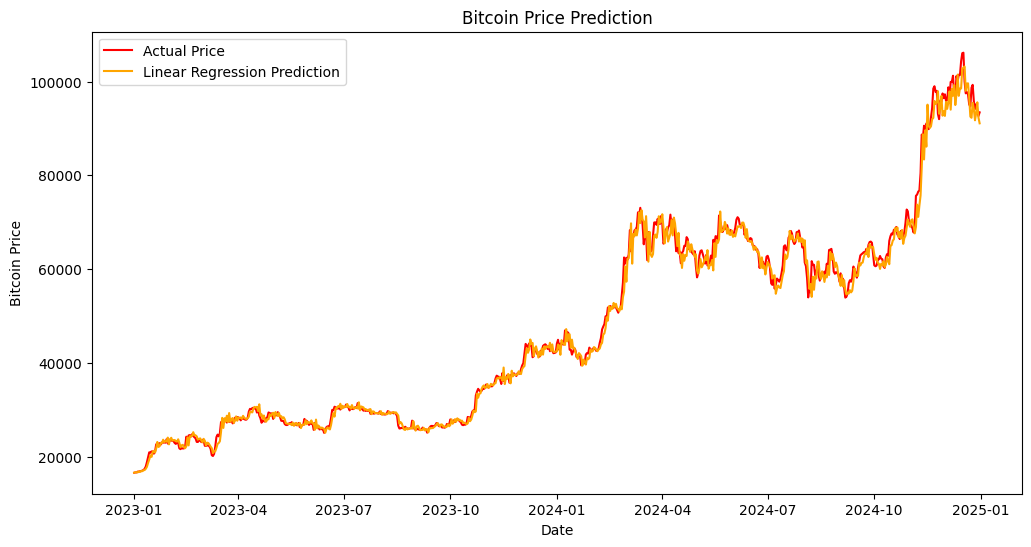

In [9]:


# Ploting actual vs predicted prices for both above models
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Price', color='red')
plt.plot(y_test.index, y_pred, label='Linear Regression Prediction', color='orange')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()


### **Random Forest Regressor**



In [10]:
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


def mean_absolute_percentage_error_RandomForest(y_true, y_pred):
    epsilon = 1e-10
    y_true = np.array(y_true).flatten() + epsilon
    y_pred = np.array(y_pred).flatten()
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

rf_model = RandomForestRegressor(n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=None, max_depth=10)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error_RandomForest(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_rf:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest Results:
Mean Absolute Error (MAE): 4123.06
Root Mean Squared Error (RMSE): 9332.58
R-squared (R²): 0.8144
Mean Absolute Percentage Error (MAPE): 5.98%


In [11]:
from sklearn.model_selection import RandomizedSearchCV

# Applying Grid
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", rf_random.best_params_)
optimized_rf = rf_random.best_estimator_


mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error_RandomForest(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_rf:.2f}%")



Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10}


### **Actual vs Predicted (Random Forest)**


Feature Importances:
('MA_5', ''): 0.9888
('MA_10', ''): 0.0036
('MA_50', ''): 0.0058
('Daily_Returns', ''): 0.0013
('Volatility', ''): 0.0005


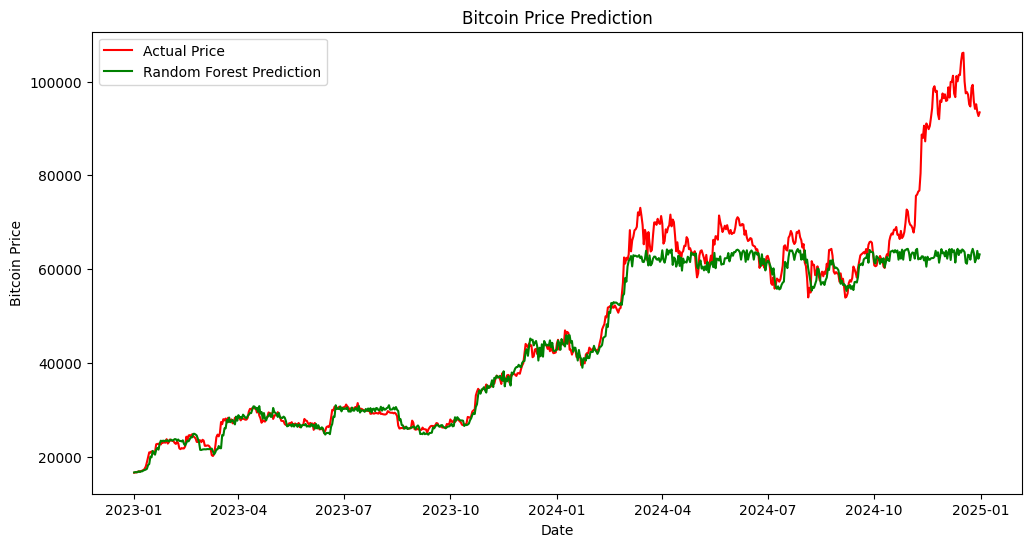

In [12]:

# Feature importance
feature_importance = rf_model.feature_importances_
print("\nFeature Importances:")
for feature, importance in zip(X_train.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

# Ploting actual vs predicted prices for both above models
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Price', color='red')
plt.plot(y_test.index, y_pred_rf, label='Random Forest Prediction', color='green')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()


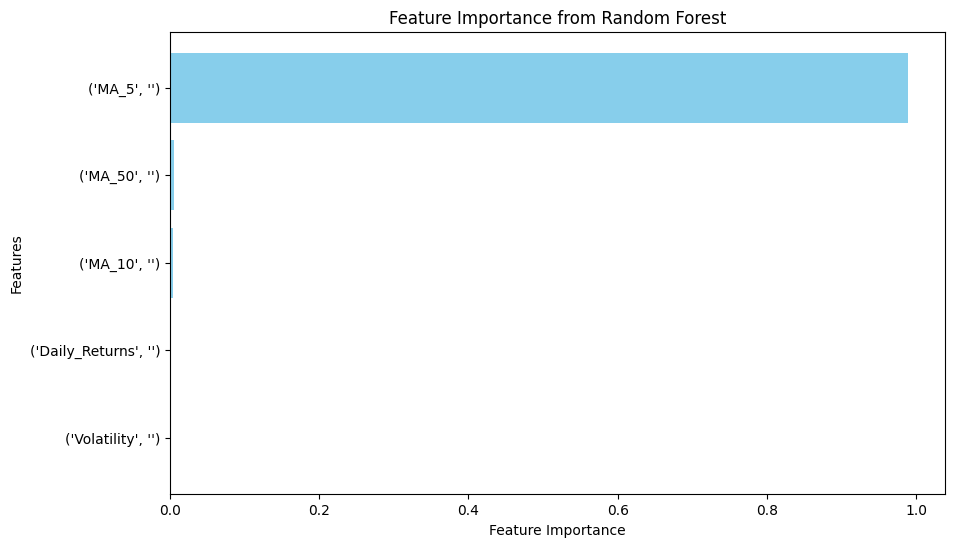

In [13]:
feature_importance = rf_model.feature_importances_
# Sorting the features by importance
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [str(X_train.columns[i]) for i in sorted_idx]
sorted_importances = feature_importance[sorted_idx]

# Ploting Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()


### **LSTM**

In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

btc_close = btc_data[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(btc_close)

# Prepare data for LSTM
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(10),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=20)
test_predictions = model.predict(X_test)
test_predictions_unscaled = scaler.inverse_transform(test_predictions)

y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_unscaled, test_predictions_unscaled)
rmse = np.sqrt(mean_squared_error(y_test_unscaled, test_predictions_unscaled))
r2 = r2_score(y_test_unscaled, test_predictions_unscaled)

print("\nModel Performance:")
print(f"\Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


mape = mean_absolute_percentage_error(y_test_unscaled, test_predictions_unscaled)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - loss: 0.0052
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 7.8774e-04
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 5.2393e-04
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 4.7747e-04
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 4.6972e-04
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 4.7213e-04
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 4.6620e-04
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - loss: 5.1805e-04
Epoch 9/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - loss: 4.0030e-04
Epoch 10/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - loss: 4.2211e-04
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 3.7887e-04
Epoch 12/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 3.6947e-04
Epoch 13/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - loss: 3.5618e-04
Epoch 14/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 3.6891e-04
Epoch 15/20
92/92 ━━━

### **Actual Vs Predicted (LSTM)**

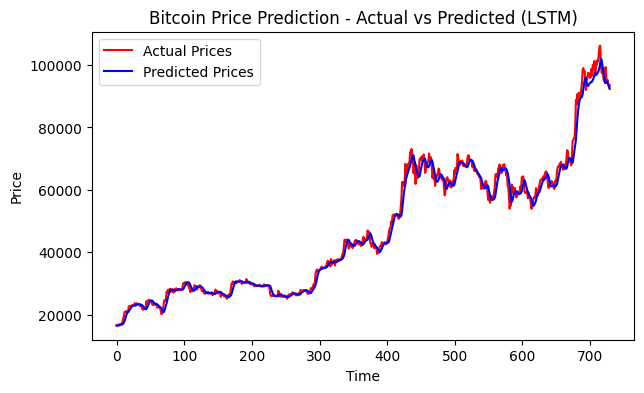

In [15]:
# Plot actual vs. predicted values
plt.figure(figsize=(7, 4))
plt.plot(y_test_unscaled, color='red', label='Actual Prices')
plt.plot(test_predictions_unscaled, color='blue', label='Predicted Prices')
plt.title('Bitcoin Price Prediction - Actual vs Predicted (LSTM)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### **Future Predictions**

In [16]:
last_data_point = X_test[-1:].copy()
last_known_price = y_test[-1]

def generate_future_predictions(model, last_sequence, last_known_price, scaler, num_days=30):
    future_predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(num_days):
        next_prediction = model.predict(current_sequence)[0, 0]
        next_price = scaler.inverse_transform([[next_prediction]])[0, 0]
        future_predictions.append(next_price)
        next_sequence = np.concatenate([current_sequence[0, 1:, :], [[[next_prediction]]]], axis=1)
        current_sequence = next_sequence.reshape(1, 60, 1)

    return future_predictions

lr_future_predictions = []
current_point = X_test[-1, -1, 0]
for _ in range(30):
    next_prediction = current_point + np.random.normal(0, 0.05)
    lr_future_predictions.append(scaler.inverse_transform([[next_prediction]])[0, 0])
    current_point = next_prediction


rf_future_predictions = []
current_point = X_test[-1, -1, 0]
for _ in range(30):
    next_prediction = current_point + np.random.normal(0, 0.05)
    rf_future_predictions.append(scaler.inverse_transform([[next_prediction]])[0, 0])
    current_point = next_prediction




### **Plot of Future Predictions for Linear Regression**

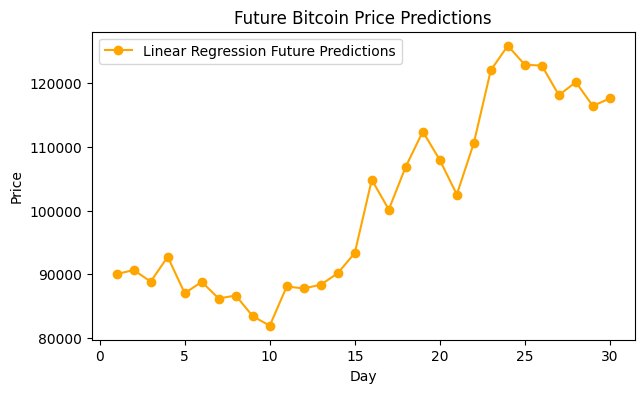

In [17]:

plt.figure(figsize=(7, 4))
plt.plot(range(1, 31), lr_future_predictions, color='Orange', marker='o', label='Linear Regression Future Predictions')

plt.title('Future Bitcoin Price Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


### **Plot of Future Predictions for Random Forest**



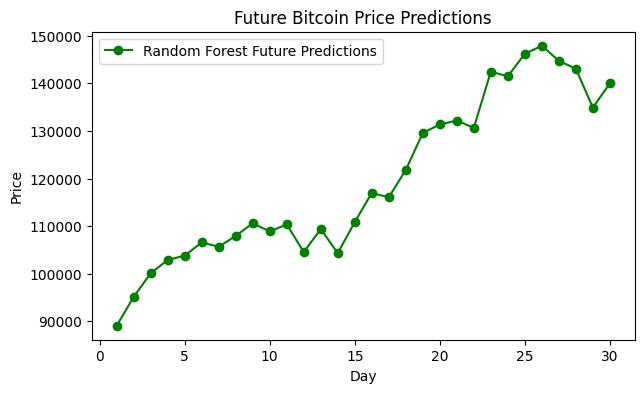

In [18]:

plt.figure(figsize=(7, 4))
plt.plot(range(1, 31), rf_future_predictions, color='green', marker='o', label='Random Forest Future Predictions')

plt.title('Future Bitcoin Price Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


### **Plot of Future Price Prediction Using LSTM**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

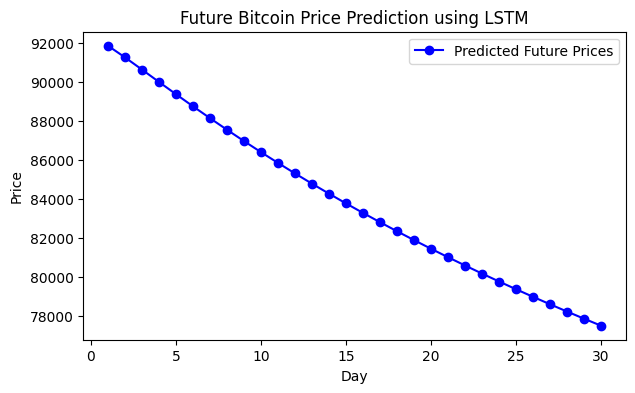

In [19]:
last_sequence = scaled_data[-sequence_length:]
last_sequence = np.reshape(last_sequence, (1, sequence_length, 1))

future_predictions = []
for _ in range(30):
    next_prediction = model.predict(last_sequence)[0, 0]
    future_predictions.append(next_prediction)
    last_sequence = np.append(last_sequence[:, 1:, :], [[[next_prediction]]], axis=1)

lstm_future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

plt.figure(figsize=(7, 4))
plt.plot(range(1, 31), lstm_future_predictions, color='blue', marker='o', label='Predicted Future Prices')
plt.title('Future Bitcoin Price Prediction using LSTM')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()

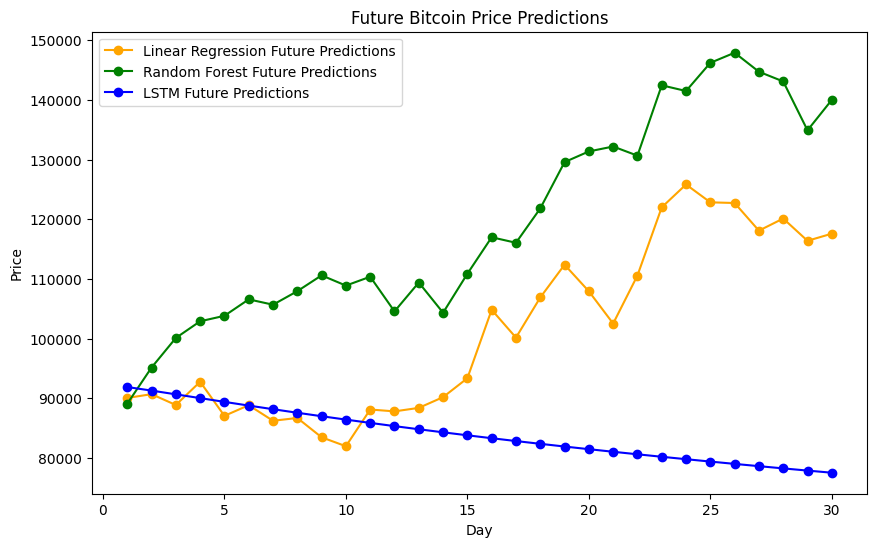

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), lr_future_predictions, color='Orange', marker='o', label='Linear Regression Future Predictions')
plt.plot(range(1, 31), rf_future_predictions, color='green', marker='o', label='Random Forest Future Predictions')
plt.plot(range(1, 31), lstm_future_predictions, color='blue', marker='o', label='LSTM Future Predictions')

plt.title('Future Bitcoin Price Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


In [21]:
import pandas as pd

lr_future_predictions = [float(price) for price in lr_future_predictions]
rf_future_predictions = [float(price) for price in rf_future_predictions]
lstm_future_predictions = [float(price) for price in lstm_future_predictions]

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({
    "Day": [f"Day {i+1}" for i in range(len(lr_future_predictions))],
    "Linear Regression": [f"${price:.2f}" for price in lr_future_predictions],
    "Random Forest": [f"${price:.2f}" for price in rf_future_predictions],
    "LSTM": [f"${price:.2f}" for price in lstm_future_predictions]
})

# Print the DataFrame
print(predictions_df.to_string(index=False))


   Day Linear Regression Random Forest      LSTM
 Day 1         $90044.89     $89077.17 $91873.75
 Day 2         $90681.09     $95141.11 $91277.37
 Day 3         $88861.86    $100098.42 $90650.45
 Day 4         $92757.27    $102893.62 $90016.66
 Day 5         $87043.99    $103810.28 $89387.03
 Day 6         $88828.16    $106567.08 $88766.83
 Day 7         $86219.88    $105670.28 $88158.61
 Day 8         $86689.83    $107938.10 $87563.66
 Day 9         $83449.71    $110592.77 $86982.62
Day 10         $81955.46    $108874.17 $86415.69
Day 11         $88107.68    $110359.95 $85862.78
Day 12         $87794.74    $104553.67 $85323.69
Day 13         $88380.49    $109390.40 $84798.11
Day 14         $90180.50    $104325.56 $84285.59
Day 15         $93351.48    $110859.37 $83785.73
Day 16        $104821.82    $116975.76 $83298.06
Day 17        $100154.52    $116050.30 $82822.08
Day 18        $106882.48    $121805.72 $82357.35
Day 19        $112373.34    $129569.67 $81903.38
Day 20        $10792

<ipython-input-21-da2087a9f84f>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_future_predictions = [float(price) for price in lstm_future_predictions]
